In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import scipy.stats as stats
from scipy import stats
import statistics
import country_converter as coco

alpha = 0.05

fsafasf 


In [130]:
import pandas as pd

# Загрузим получившийся DF 

data_upd = pd.read_csv('data/ds_salaries_upd.csv')

# Произведем преобразование признаков в категориальные 

for elem in data_upd.columns:
    if elem == 'salary_in_usd':
        pass
    else:
        data_upd['{}'.format(elem)] = data_upd['{}'.format(elem)].astype('category')


# Выведем информацию по DF и его признакам

display(data_upd.info())
display(data_upd.describe(exclude='int64'))
display(data_upd.describe(include='int64'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    category
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_field           565 non-null    category
 4   salary_in_usd       565 non-null    int64   
 5   employee_residence  565 non-null    category
 6   remote_ratio        565 non-null    category
 7   company_location    565 non-null    category
 8   company_size        565 non-null    category
dtypes: category(8), int64(1)
memory usage: 10.3 KB


None

,work_year,experience_level,employment_type,job_field,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565
unique,3,4,4,3,6,3,6,3
top,2022,SE,FT,DS,America,100,America,M
freq,278,243,546,279,336,346,355,290


,salary_in_usd
count,565.000000
mean,110610.343363
std,72280.702792
min,2859.000000
25%,60757.000000
50%,100000.000000
75%,150000.000000
max,600000.000000


**Промежуточный вывод:**

В ходе предварительной обработки данных мы выяснили, что отсутствуют незаполненные признаки. Так же, обнаружили 42 дубликата и избавились от них. Так же, произвели очистку данных от неинформативных признаков, а именно: значение зарплаты и валюта зарплаты (salary, salary_currency). Причиной этому послужило наличие признака "salary_in_usd", который уже унифицирован для оценки уровня заработных плат сотрудников и его хватит для решения поставленных задач. 

Произвели преобразование признаков касательно стран, произвели укрупнение от страны к региону в части признаков нахождения компаний и резидентства работников, таким образом сведя значения признаков всего к 6 уникальным значениями. 

Так же, признак описания занимаемой должности тоже претерпел изменения в той части, что все значения свели к трем - к сферам деятельности работников: Data Science, Data Engineering и Data Analytics. 

Произвели преобразование типов данных признаков, и получили, что к числовым мы относим только заработную плату, остальные признаки относятся к категориальным. 

Воспользовавшись методом описательной статистики мы можем уже сделать ряд наблюдений: 

- Наиболее часто встречающийся регион расположения компаний и резидентства работников - Америка
- Наиболее часто встречающееся сфера деятельности - Data Science
- Предпочтительна постоянная занятость с удаленным режимом работы
- Превалируют компании среднего размера 
- Лидером в части зарплат по году является 2022 год, что уже подталкивает к мысли о том, что данных сектор IT сейчас находится на подъеме
- Что касается заработных плат, стоит отметить, что медианная зарплата хоть и отличается от средней, но не сильно (100.000 USD против 110.610 USD). При этом минимальный и максимальный размеры заработных плат очень сильно отличаются с медианным значением. Половина же всех заработных плат лежит в диапазоне 60.757 - 150.000 USD. 


# Визуальный анализ данных

В визуализации данных начнем анализ с числового признака - уровень зароботной платы. 
Для данного признака построим гистограмму, а так же коробчатую диаграмму. Есть вероятность, что потребуется обработка выбросов.

C:\Users\nitys\AppData\Local\Temp\ipykernel_4052\4235818976.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


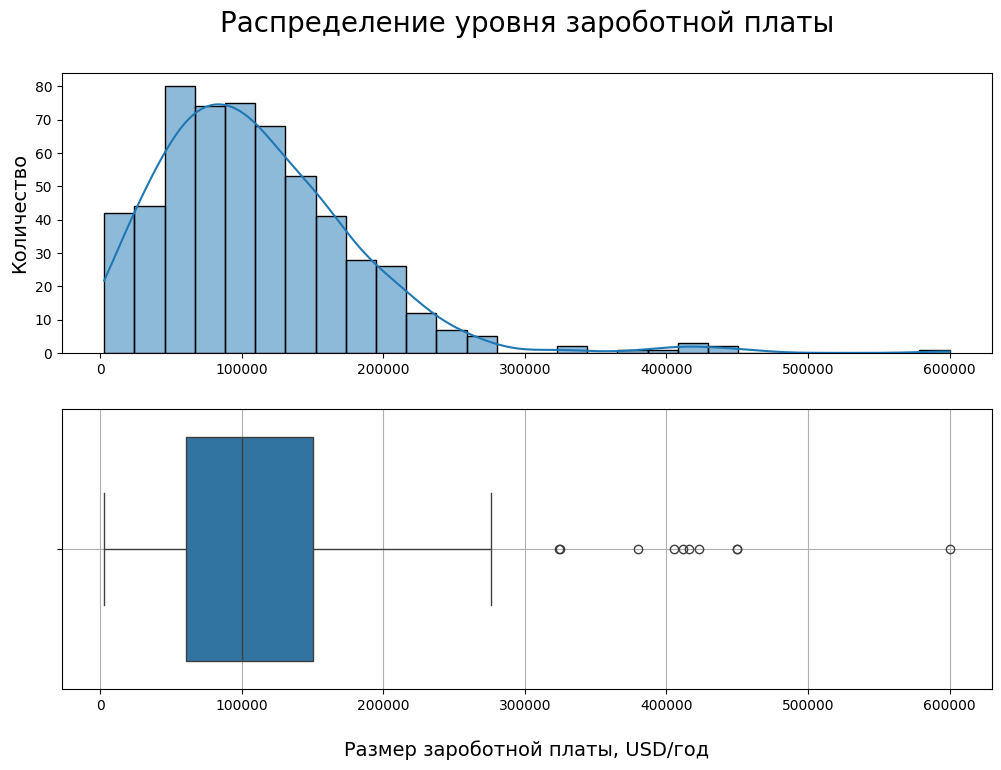

In [131]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)

salary_hist = sns.histplot(
    data=data_upd,
    x = 'salary_in_usd',
    kde = True,
    ax=axes[0]
    )

salary_hist.set_title('Распределение уровня зароботной платы''\n',
                      fontsize=20)
salary_hist.set_ylabel('Количество', fontsize = 14)
salary_hist.set_xlabel('')


salary_box = sns.boxplot(
    data = data_upd,
    x = 'salary_in_usd',
    orient='h',
    ax=axes[1], 
    )

salary_box.set_xlabel('\n''Размер зароботной платы, USD/год',
                       fontsize = 14)
salary_box.grid()

fig.show()

В результате построения коробчатой диаграммы мы наблюдаем ряд выбросов по уровню зароботной платы. 
Произведем выгрузку этих строк, для более детального изучения и принятия решения по ним.

In [132]:
iqr = data_upd['salary_in_usd'].quantile(0.75) - \
    data_upd['salary_in_usd'].quantile(0.25)

mustashe_right = iqr*3 + data_upd['salary_in_usd'].min()

display(data_upd[data_upd['salary_in_usd'] > mustashe_right])

,work_year,experience_level,employment_type,job_field,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,DS,325000,America,100,America,L
33,2020,MI,FT,DS,450000,America,0,America,M
63,2020,SE,FT,DS,412000,America,100,America,L
93,2021,SE,FT,DE,276000,America,0,America,L
97,2021,MI,FT,DA,450000,America,100,America,L
157,2021,MI,FT,DS,423000,America,50,America,L
224,2021,EX,CT,DS,416000,America,100,America,S
251,2021,EX,FT,DE,600000,America,100,America,L
461,2022,EX,FT,DE,324000,America,100,America,M
498,2022,SE,FT,DS,380000,America,100,America,L


По результатам проверки данных принято решение об удалении одного значение, с указанной оплатой в 600.000 USD. Возможно, это не является ошибочными данными, но это будет искажать общую картину.

# НОРМЛАЬНОСТЬ ???

In [133]:
# index_to_drop = data_upd[data_upd['salary_in_usd'] == 600000].index

# data_upd = data_upd.drop(labels=index_to_drop, axis=0)

Произведем визуальный анализ данных **категориальных признаков**. 

В качестве средства визуализации используем гистограммы. 
Предварительно, для удобства дальнейшего изучения, создадим копию DF, в котором произведем замену значений признаков на легко читаемые с ясным отражением смысла значения признака. 

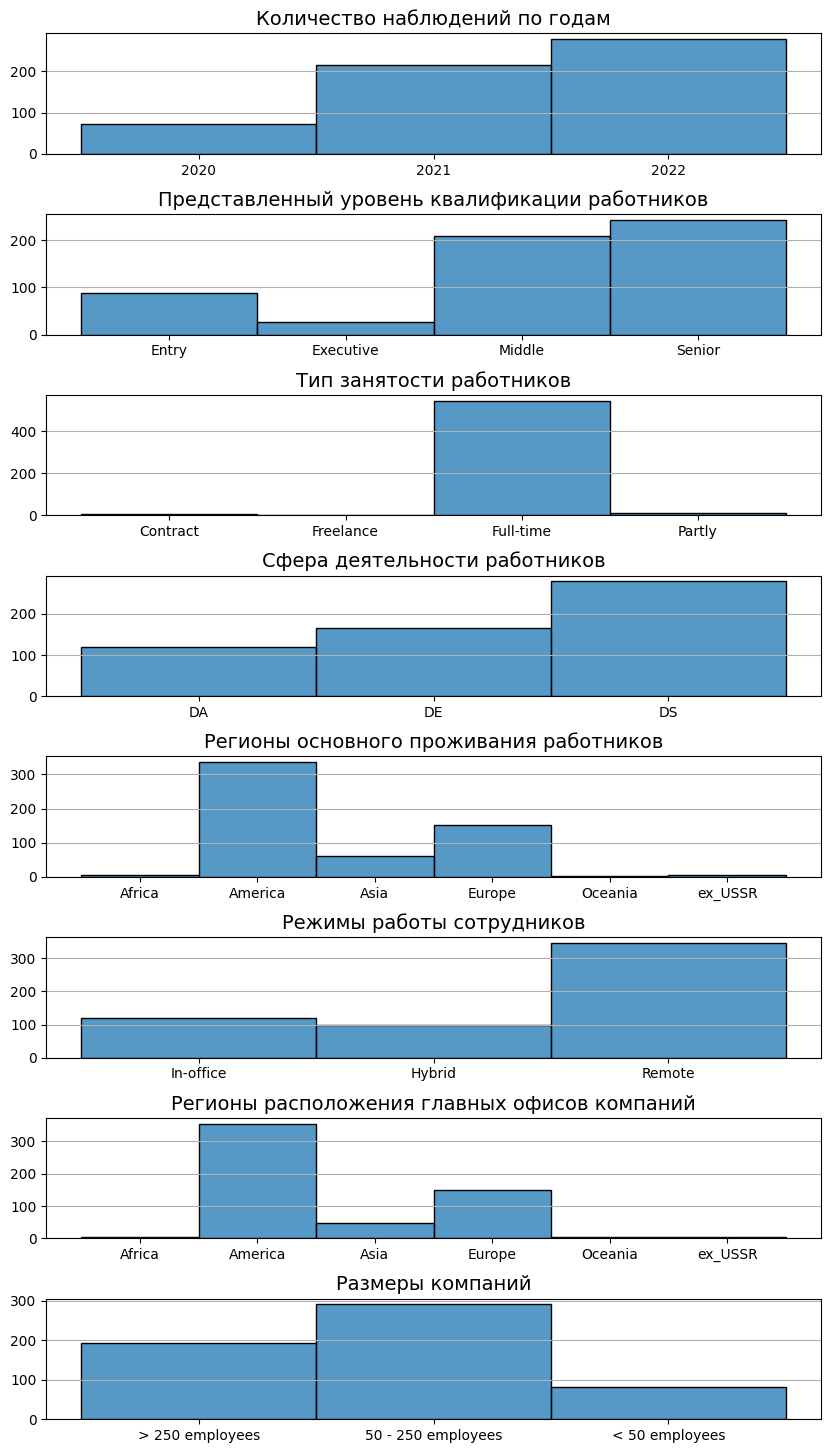

In [134]:
# Создаем копию DF, прописываем функции изменения значений 
# признаков и применяем их /

data_easy_read = data_upd.copy()

def exprnc_refill(x):
    if x == 'EN':
        return 'Entry'
    if x == 'MI':
        return 'Middle'
    if x == 'SE':
        return 'Senior'
    if x == 'EX':
        return 'Executive'

data_easy_read['experience_level'] = \
    data_easy_read['experience_level'].apply(exprnc_refill)
    

def empl_type_refill(x):
    if x == 'PT':
        return 'Partly'
    if x == 'FT':
        return 'Full-time'
    if x == 'CT':
        return 'Contract'
    if x == 'FL':
        return 'Freelance'
    
data_easy_read['employment_type'] = \
    data_easy_read['employment_type'].apply(empl_type_refill)
    

def remote_ratio_refill(x):
    if x == 0:
        return 'In-office'
    if x == 50:
        return 'Hybrid'
    if x == 100:
        return 'Remote'
    
data_easy_read['remote_ratio'] = \
    data_easy_read['remote_ratio'].apply(remote_ratio_refill)


def company_size_refill(x):
    if x == 'S':
        return '< 50 employees'
    if x == 'M':
        return '50 - 250 employees'
    if x == 'L':
        return '> 250 employees'
    
data_easy_read['company_size'] = \
    data_easy_read['company_size'].apply(company_size_refill)


# Визуализируем данные, при этом, зададим читаемые заголовки 
# Для упрощения работы, при построении задействуем функцию /

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = (10, 18))
plt.subplots_adjust(hspace=0.5)


title_list = ['Количество наблюдений по годам',
             'Представленный уровень квалификации работников',
             'Тип занятости работников',
             'Сфера деятельности работников',
             'Регионы основного проживания работников',
             'Режимы работы сотрудников',
             'Регионы расположения главных офисов компаний',
             'Размеры компаний'
             ]

cols_list = list(data_upd.columns)
cols_list.remove('salary_in_usd')

counter = 0

for elem in cols_list:
    hist = sns.histplot(
        data_easy_read,
        x='{}'.format(elem),
        ax=axes[counter],
        )
    
    hist.set_xlabel('')
    hist.set_ylabel('')
    hist.set_title(f'{title_list[counter]}', fontsize = 14)
    hist.grid(axis='y', which='major')
    
    # Для признака года пропишем, что будет выводиться на график
    if counter == 0:
        hist.set_xticks([2020,2021,2022])
    
    counter+=1
    


**По результатам построения распределения признаков можно сделать следующие предварительные выводы:**

Сфера IT, связанная c Data science в данный момент развивается, о чем свидетельствует увеличение данных по ней по годам. 
В выборке бОльшая часть работников имеет квалификацию Middle и Senior. 

Что касается типа трудовых взаимоотношений с работодателем, мы наблюдаем абсолютное большинство работников с полной занятостью. Что же касается режима работы, то превалирует удаленный режим работы. При этом, гибридный и офисный режимы примерно у одинакового количества работников. 

Примерно половина из всех представленных работников заняты в сфере Data Science, на втором и третьем месте соответственно, Data Engineering и Data Analytics.

Касаемо географических признаков. Что касаемо мест проживания работников, что мест нахождения головных офисов, безоговорочным лидером выборки является Америка. При этом, как мы условились ранее, под ней, в большей части подразумевается США. Далее, на втором месте, с количеством упоминаний, отличных от Америки более чем в два раза, идет Европа, на третьем месте, с еще большим отрывом, Азия. 

В выборке примерно половина упоминаний относится к компаниям среднего размера. Компании большого размера представлены в трети упоминаний, остальное – компании малого размера. 


# Исследование взаимосвязей

**В ходе этого блока будет произведена оценка взаимосвязи признаков между собой, а так же обнаружение признаков, оказывающих влияние на уровень зароботной платы.**

## Кодирование

Для оценки влияния признаков друг на друга, применим матрицу корреляции. Т.к. почти все признаки наших данных являются категориальными, необходимо применить кодирование. 
Порядковому кодированию будут подвергнуты признаки опыта сотрудников и размер компании. Остальные признаки будут обработаны при помощи однократного кодирования.

C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtyp

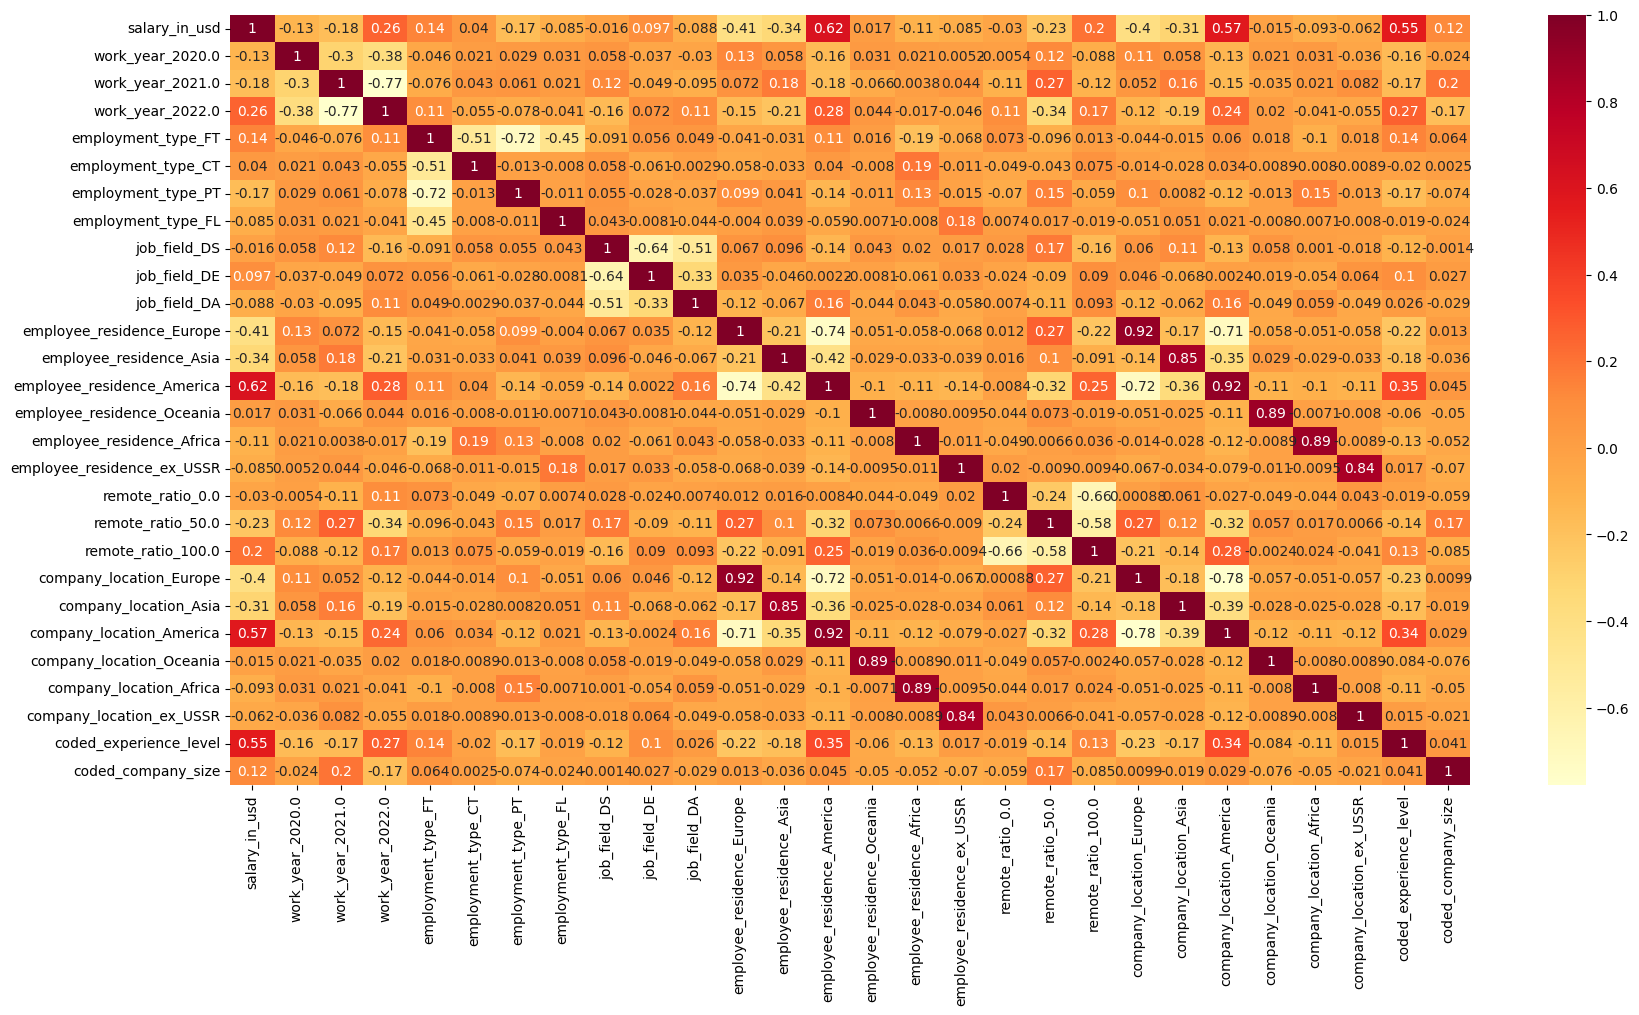

In [135]:
# Создадим новый DF, который будет по итогу представлять 
# только закодированные признаки /

data_encodered = data_upd.copy()

# Список для однократного кодирования
onehot_enc_list = ['work_year', 'employment_type', 
                   'job_field', 'employee_residence', 
                   'remote_ratio', 'company_location',]

# Список для порядкового кодирования и ключи кодирования
ordinal_enc_list = ['experience_level', 'company_size']
mapping_exp = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
mapping_size = {'S': 1, 'M': 2, 'L': 3}

# Цикл для однократного кодирования. Исходный признак удаляется. 
for elem in onehot_enc_list:
    encoder = ce.OneHotEncoder(cols=f'{elem}',
                               use_cat_names=True)
    data_bin = encoder.fit_transform(data_encodered[f'{elem}'])
    
    data_encodered = pd.concat([data_encodered, data_bin], axis=1)
    
    data_encodered = data_encodered.drop(f'{elem}', axis=1)

# Цикл для порядкого кодирования. Исходный признак удаляется. 
for elem in ordinal_enc_list:
    if elem == ordinal_enc_list[0]:
        encoder = ce.OrdinalEncoder(mapping=[{
            'col' : f'{elem}',
            'mapping' : mapping_exp 
            }])
    else:
        encoder = ce.OrdinalEncoder(mapping=[{
            'col' : f'{elem}',
            'mapping' : mapping_size 
            }])

    data_bin = encoder.fit_transform(data_encodered[[f'{elem}']])
    data_bin = pd.DataFrame(data_bin)
    
    data_bin = data_bin.rename(columns={ f'{elem}' : 'coded_' f'{elem}' } )
    
    data_encodered = pd.concat([data_encodered, data_bin], axis=1)
    data_encodered = data_encodered.drop(f'{elem}', axis=1)


# Визуализация взаимосвязи путем создания матрицы корреляции 
# При корреляции используем метод спирмена, т.к. имеем выбросы в 
# данных по зароботной плате /
fig, axes = plt.subplots(figsize=(20,10))
fig = sns.heatmap(
    data_encodered.corr(
        method = 'spearman'), 
        annot=True,
        cmap='YlOrRd'
        )


**Благодаря построенной матрице корреляции мы можем сделать ряд наблюдений, которые в дальнейшем проверим при распределении различных признаков в разрезе уровня заработных плат в виде столбчатых диаграмм.**

Сразу стоит оговориться, что в данном анализе будут отступления от усредненных значений коэффициентов корреляций в части силы корреляции. По большинству признаков коэффициенты корреляции низки, однако, мы можем сравнить коэффициенты корреляции «внутри» одной группы признаков (как, например, режим работы сотрудника). 

Итак, что первое бросается в глаза, хоть это непосредственно и не относится к уровню заработных плат, так это **высокий уровень корреляции у географических признаков**: локация компании, резидентство сотрудника. Мы можем сделать предположение, что преимущественно, локация компании совпадает с резидентством сотрудника. Выделяются регионы бывшего СССР, Азии с более низким коэффициентом корреляции, что при детальном анализе может быть объяснено работой в компаниях Америки и Европы, что так же объяснит нам, почему на пересечении этих признаков (локация компании, локация сотрудника Америка / Европа) коэффициент не единица. 


Далее будут приведены выводы в формате признак – краткое наблюдение. 

**Года**

В 2020 и 2021 году уровень заработных плат в сфере Data Science (далее – ЗП, подразумевается медианное значение признака), незначительно отличается, но в 2021 году имеется рост. 2022 год – уровень ЗП вырос более ощутимо. 

**Тип занятости**

Общие коэфициенты низки, и тяжело сделать конкретный вывод. Но, что можно сказать точно, что такой тип занятости как фриланс и частичная занятость приносят низкие доходы в данной сфере, относительно других признаков их зависимость отрицательная. 

**Сфера деятельности**

Специалисты в области Data Engineering имеют более высокие доходы. 
Регион проживания (резидентства) сотрудника
Очевидно, лидером по уровню ЗП является Америка. Интересна обратная связь уровня ЗП с признаком Европы, он отрицателен. Возможно, этот показатель объясняется большой разницей с зарплатами в Америке. 

**Режим работы сотрудников**

Наиболее высокие ЗП наблюдаются при удаленном формате работы, далее, офисный и гибридный. Возможно, это связано с тем, что на удаленном формате работы заняты преимущественно сотрудники с более высокой квалификацией.

**Регион нахождения головного офиса компании** 

Лидером так же является Америка. Все распределение, что логично, соответствует распределению региона проживания сотрудников. В целом, один из признаков, в случае создания модели, подлежит удалению, очевидно, они мультикоррелиальны. 

**Квалификация сотрудников** 

Признак имеет среднюю корреляцию с уровнем ЗП, следовательно, оказывает влияние на уровень ЗП. 

**Размер компании** 

Коэффициент корреляции говорит нам о том, что признак имеет очень слабую связь с уровнем ЗП.
Разберемся с этим в дальнейшем более детально.  


C:\Users\nitys\AppData\Local\Temp\ipykernel_4052\2270983301.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


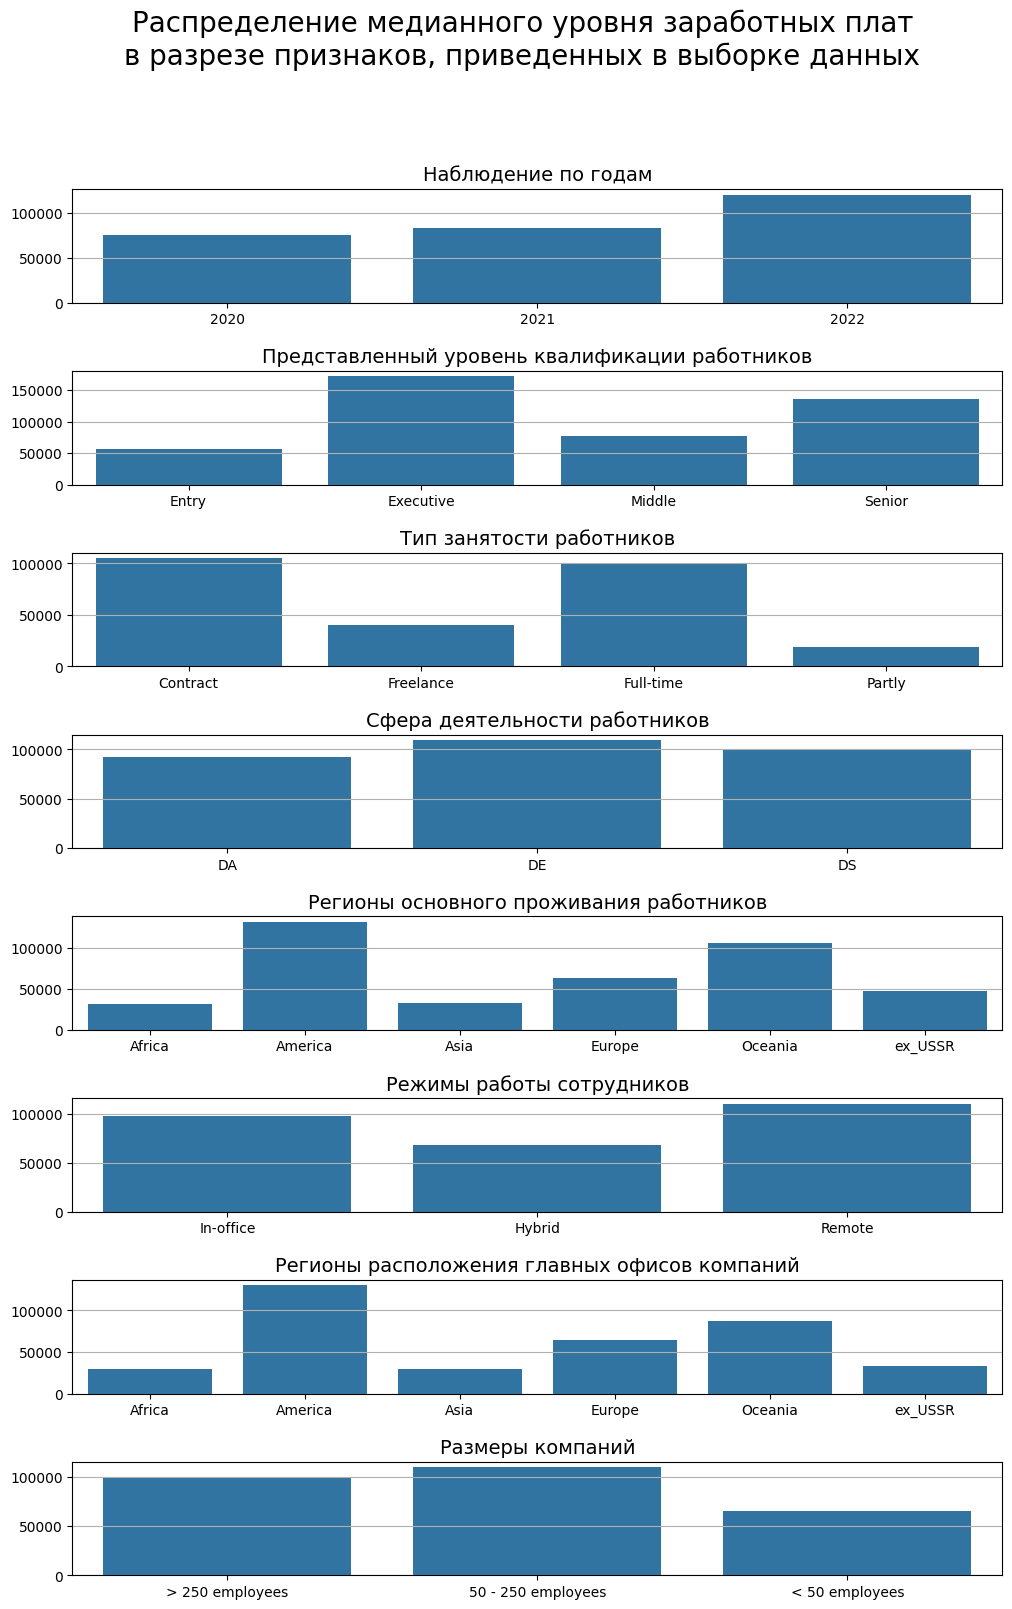

In [136]:
# Создание subplots, с настройками

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = (12, 18))
plt.subplots_adjust(hspace=0.6)

# Список заголовков графиков
title_list = ['Наблюдение по годам',
             'Представленный уровень квалификации работников',
             'Тип занятости работников',
             'Сфера деятельности работников',
             'Регионы основного проживания работников',
             'Режимы работы сотрудников',
             'Регионы расположения главных офисов компаний',
             'Размеры компаний'
             ]

# Список названий признаков, которые будем выводить в графиках 
cols_list = list(data_upd.columns)
cols_list.remove('salary_in_usd')

# Счетчик для цикла построения графиков
counter = 0

# Цикл построения графиков 
# Строим столбачатый диаграммы признаков в разрезе медианного уровня 
# заработных плат /
for elem in cols_list:
    hist = sns.barplot(
        data_easy_read,
        x=f'{elem}',
        y='salary_in_usd',
        estimator='median',
        ax=axes[counter],
        errorbar=None
        )
    
    hist.set_xlabel('')
    hist.set_ylabel('')
    hist.set_title(f'{title_list[counter]}', fontsize = 14)
    hist.grid(axis='y')
   
    counter+=1

# Название группы графиков
fig.suptitle('Распределение медианного уровня заработных плат' '\n'
             'в разрезе признаков, приведенных в выборке данных',
             fontsize = 20,
            )

fig.show()

C:\Users\nitys\AppData\Local\Temp\ipykernel_4052\926330760.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


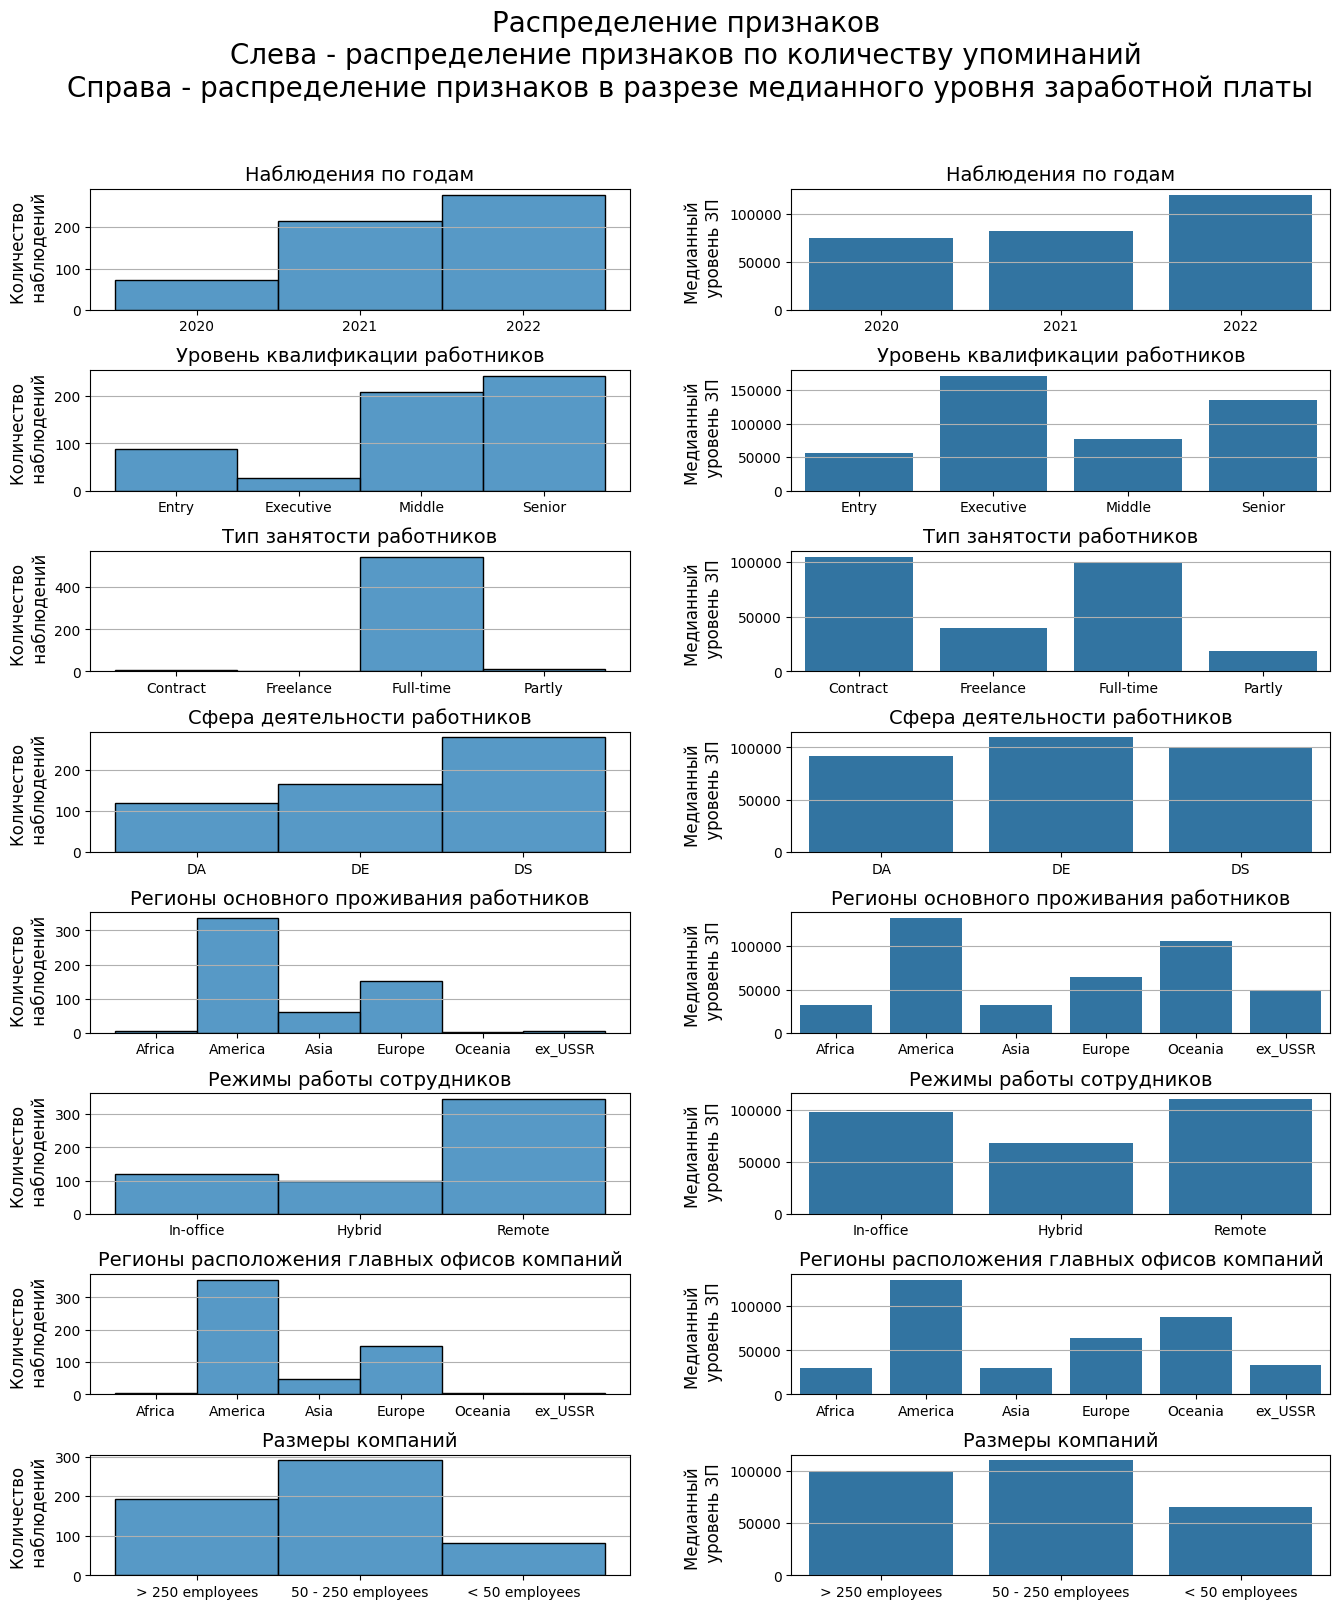

In [169]:
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (16, 18))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)


title_list = ['Наблюдения по годам',
             'Уровень квалификации работников',
             'Тип занятости работников',
             'Сфера деятельности работников',
             'Регионы основного проживания работников',
             'Режимы работы сотрудников',
             'Регионы расположения главных офисов компаний',
             'Размеры компаний'
             ]

cols_list = list(data_upd.columns)
cols_list.remove('salary_in_usd')

counter_hist = 0

for elem in cols_list:
    hist = sns.histplot(
        data_easy_read,
        x='{}'.format(elem),
        ax=axes[counter_hist][0],
        )
    
    hist.set_xlabel('')
    hist.set_ylabel('Количество \n наблюдений', fontsize = 12)
    hist.set_title(f'{title_list[counter_hist]}', fontsize = 14)
    hist.grid(axis='y', which='major')
    
    # Для признака года пропишем, что будет выводиться на график
    if counter_hist == 0:
        hist.set_xticks([2020,2021,2022])
    
    counter_hist+=1

counter_bar = 0    

for elem in cols_list:
    bar = sns.barplot(
        data_easy_read,
        x=f'{elem}',
        y='salary_in_usd',
        estimator='median',
        ax=axes[counter_bar][1],
        errorbar=None
        )
    
    bar.set_xlabel('')
    bar.set_ylabel('Медианный \n уровень ЗП', fontsize = 12)
    bar.set_title(f'{title_list[counter_bar]}', fontsize = 14)
    bar.grid(axis='y')
   
    counter_bar+=1

# Название группы графиков
fig.suptitle('Распределение признаков \n'
             'Слева - распределение признаков по количеству упоминаний \n'
             'Справа - распределение признаков в разрезе медианного уровня '
             'заработной платы'
             ,
             fontsize = 20,
            )

fig.show()   

In [137]:
data_upd[data_upd['company_size'] == 'M']['salary_in_usd'].median() / data_upd[data_upd['company_size'] == 'S']['salary_in_usd'].median()

1.6736120651493642

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

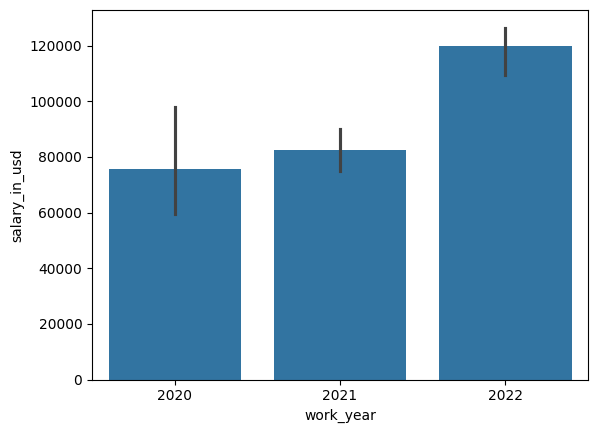

In [138]:
sns.barplot(
    data=data_upd,
    x = 'work_year',
    y='salary_in_usd',
    estimator='median'
    )

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

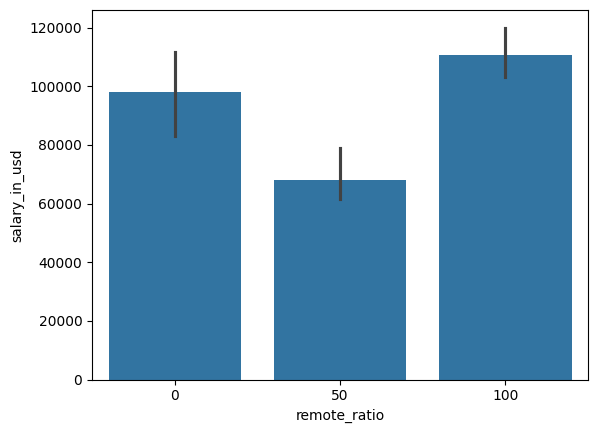

In [139]:
sns.barplot(
    data=data_upd,
    x = 'remote_ratio',
    y='salary_in_usd',
    estimator='median'
    )

In [140]:
data_upd[data_upd['employee_residence'] == 'America'].shape[0]
data_upd[(data_upd['employee_residence'] == 'America') & (data_upd['company_location'] == 'America')].shape[0]

data_encodered = data_upd.copy()

onehot_enc_list

for elem in onehot_enc_list:
    


# YEAR

encoder = ce.OneHotEncoder(cols='work_year', use_cat_names=True)
location_bin = encoder.fit_transform(data_upd['work_year'])

data_encodered = pd.concat([data_encodered, location_bin], axis=1)


# COMPANY LOCATION

encoder = ce.OneHotEncoder(cols='company_location', use_cat_names=True)
location_bin = encoder.fit_transform(data_upd['company_location'])

data_encodered = pd.concat([data_encodered, location_bin], axis=1)

# EMPLOYEE RESIDENCE

encoder = ce.OneHotEncoder(cols='employee_residence', use_cat_names=True)
job_bin = encoder.fit_transform(data_upd['employee_residence'])

data_encodered = pd.concat([data_encodered, job_bin], axis=1)

# COMPANY SIZE 

encoder = ce.OrdinalEncoder(mapping=[{
    'col' : 'company_size',
    'mapping' : {'S': 1, 'M': 2, 'L': 3} 
}])

size_bin = encoder.fit_transform(data_encodered['company_size'])

data_encodered = pd.concat([data_encodered, size_bin], axis=1)
    
# FIELD

encoder = ce.OneHotEncoder(cols='job_field', use_cat_names=True)
field_bin = encoder.fit_transform(data_encodered['job_field'])

data_encodered = pd.concat([data_encodered, field_bin], axis=1)



fig, axes = plt.subplots(figsize=(20,10))
fig = sns.heatmap(data_encodered.corr(numeric_only=True, method = 'spearman'), annot=True)

IndentationError: expected an indented block after 'for' statement on line 10 (2875322197.py, line 16)

100000.0

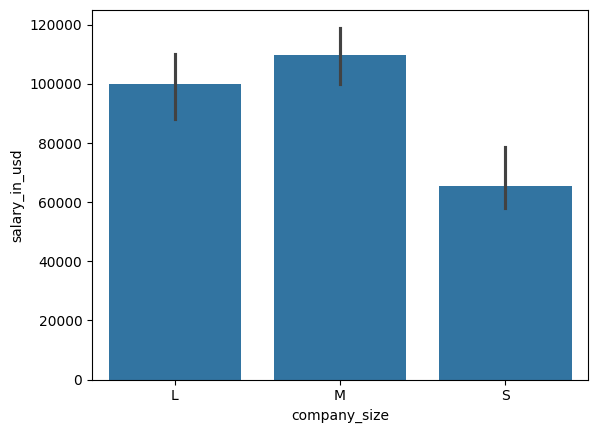

In [ ]:
sns.barplot(
    data=data_upd,
    x = 'company_size',
    y='salary_in_usd',
    estimator='median'
    
)

data_upd[data_upd['company_size'] == 'S']['salary_in_usd'].median()
data_upd[data_upd['company_size'] == 'M']['salary_in_usd'].median()
data_upd[data_upd['company_size'] == 'L']['salary_in_usd'].median()



<Axes: xlabel='job_field', ylabel='salary_in_usd'>

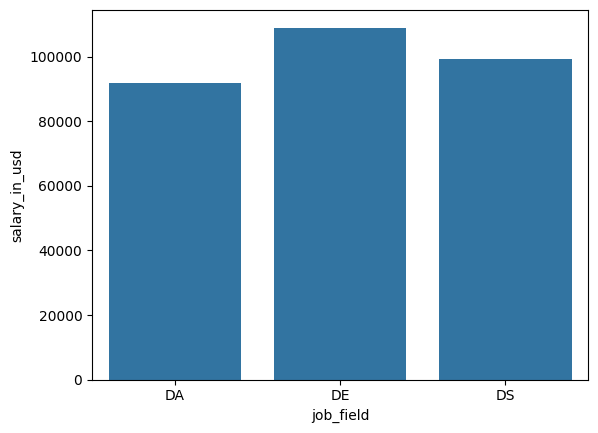

In [ ]:
sns.barplot(
    data=data_upd,
    x = 'job_field',
    y='salary_in_usd',
    estimator='median',
    errorbar=None
    
)

# data_upd[data_upd['company_size'] == 'S']['salary_in_usd'].median()
# data_upd[data_upd['company_size'] == 'M']['salary_in_usd'].median()
# data_upd[data_upd['company_size'] == 'L']['salary_in_usd'].median()

C:\Users\nitys\AppData\Local\Temp\ipykernel_25848\2098965509.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hm_data = data_upd.pivot_table(
C:\Users\nitys\AppData\Local\Temp\ipykernel_25848\2098965509.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


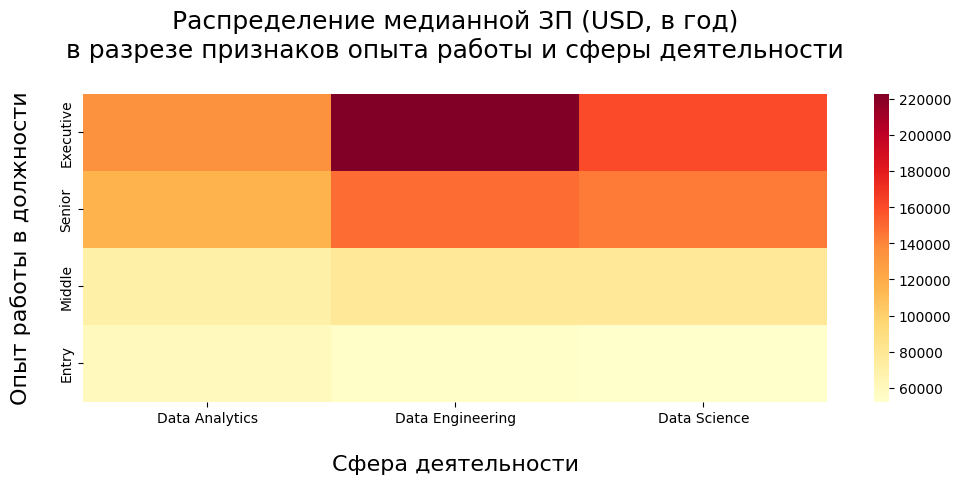

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(figsize=(12, 4))


hm_data = data_upd.pivot_table(
    values = 'salary_in_usd',
    index= 'experience_level',
    columns='job_field',
    aggfunc='median',
    )

hm_data = hm_data.loc[['EX', 'SE', 'MI', 'EN']]

yticklabl_list = ['Executive', 'Senior', 'Middle', 'Entry']
xticklabl_list = ['Data Analytics', 'Data Engineering', 'Data Science']

exper_field_sal = sns.heatmap(
    data = hm_data,
    cmap = 'YlOrRd',
    yticklabels = yticklabl_list,
    xticklabels= xticklabl_list
    )

exper_field_sal.set_ylabel('Опыт работы в должности' '\n', fontsize = 16)
exper_field_sal.set_xlabel('\n' 'Сфера деятельности', fontsize = 16)
exper_field_sal.set_title(('Распределение медианной ЗП (USD, в год)' + '\n' +
            'в разрезе признаков опыта работы и сферы деятельности''\n'),
            fontsize = 18 
            )

fig.show()


C:\Users\nitys\AppData\Local\Temp\ipykernel_25848\3257090207.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hm_2_data = data_upd.pivot_table(


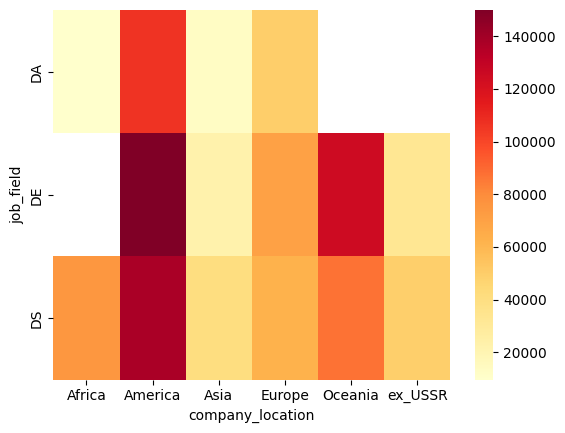

In [ ]:


hm_2_data = data_upd.pivot_table(
    values = 'salary_in_usd',
    index= 'job_field',
    columns='company_location',
    aggfunc='median',
    )

exper_field_sal = sns.heatmap(
    data = hm_2_data,
    cmap = 'YlOrRd',

    )

C:\Users\nitys\AppData\Local\Temp\ipykernel_25848\1981643811.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hm_3_data = data_upd.pivot_table(


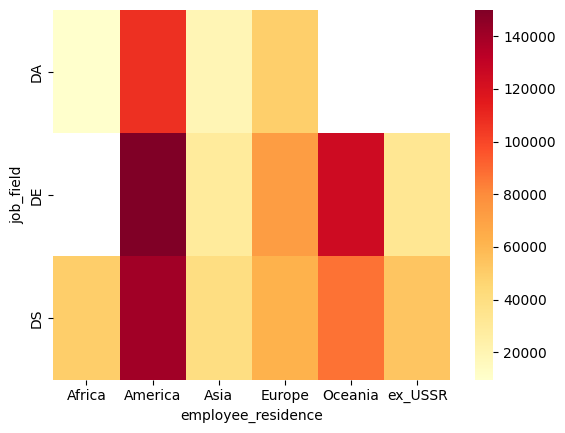

In [ ]:
hm_3_data = data_upd.pivot_table(
    values = 'salary_in_usd',
    index= 'job_field',
    columns='employee_residence',
    aggfunc='median',
    )

exper_field_sal = sns.heatmap(
    data = hm_3_data,
    cmap = 'YlOrRd',

    )

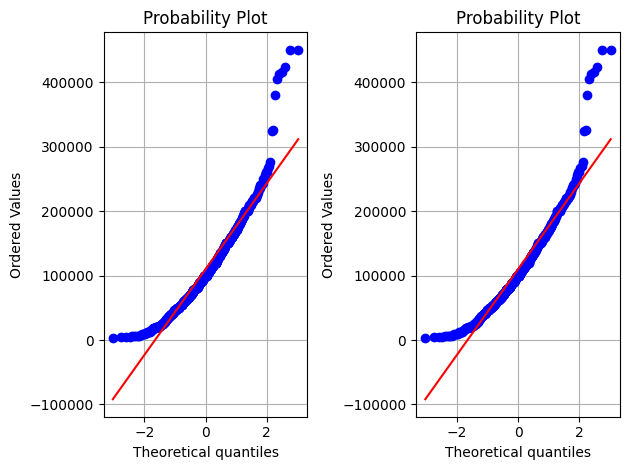

In [ ]:
from scipy import stats

plt.subplot(1, 2, 1)
stats.probplot(data_upd['salary_in_usd'], plot = plt)
plt.grid()

plt.subplot(1, 2, 2)
stats.probplot(data_upd['salary_in_usd'], plot = plt)
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:

test_data = data_upd.copy()

def country_chng(x):
    if x == 'Africa':
        return 1
    if x == 'America':
        return 2
    if x == 'Asia':
        return 3
    if x == 'Europe':
        return 4
    if x == 'Oceania':
        return 5
    if x == 'ex_ussr':
        return 6    
    
test_data['company_location'] = test_data['company_location'].apply(country_chng)


test_data[['salary_in_usd', 'company_location']].corr(method='kendall')

,salary_in_usd,company_location
salary_in_usd,1.000000,-0.391913
company_location,-0.391913,1.000000


In [ ]:

data_new = pd.read_csv('data/ds_salaries_SF.csv', index_col = 'Unnamed: 0')

country_df = pd.DataFrame(data_new['company_location'].value_counts())
# country_df = country_df.droplevel(0, axis=1)

country_df = country_df.reset_index(names='country')
country_df

def country_name_full(x):

    converter = coco.CountryConverter()
    result = converter.convert(names = x, src='ISO2', to='name_short')
        
    return result

country_df['country'] = country_df['country'].apply(country_name_full)
country_df

,country,count
0,United States,355
1,United Kingdom,47
2,Canada,30
3,Germany,28
4,India,24
5,France,15
6,Spain,14
7,Greece,11
8,Japan,6
9,Netherlands,4


In [ ]:
display(data_new.value_counts())

unique_list = []
# пробегаемся по именам столбцов в таблице
for col in data_new.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, data_new[col].nunique(),data_new[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

work_year  experience_level  employment_type  job_title           salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
2022       SE                FT               Data Scientist      140000  USD              140000         US                  100           US                M               6
                                              Data Analyst        90320   USD              90320          US                  100           US                M               5
                                              Data Scientist      210000  USD              210000         US                  100           US                M               4
                                              Data Analyst        112900  USD              112900         US                  100           US                M               4
                                              Data Scientist      123000  USD              123000         US                 

,Column_Name,Num_Unique,Type
0,work_year,3,int64
1,remote_ratio,3,int64
2,company_size,3,object
3,experience_level,4,object
4,employment_type,4,object
5,salary_currency,17,object
6,job_title,50,object
7,company_location,50,object
8,employee_residence,57,object
9,salary,272,int64
